In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns = iris.feature_names)
irisdf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
irisdf.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [4]:
irisdf.shape

(150, 4)

In [5]:
irisdf.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
irisdf.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
x = irisdf.iloc[:, [0, 1, 2, 3]].values

# Using the elbow method 

In [8]:
wcs=[]

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(irisdf)
    wcss_iter=kmeans.inertia_
    wcs.append(wcss_iter)
    
wcs

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.316578453710044,
 30.71427532356816,
 27.888241626794276]

Text(0, 0.5, 'Within Clusters Sum of squares')

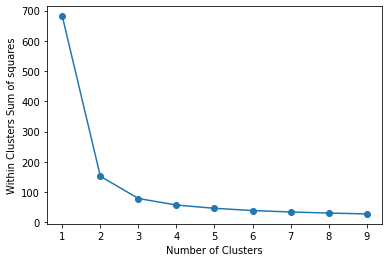

In [9]:
nu_clusters=range(1,10)
plt.plot(nu_clusters,wcs,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of squares')

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
_kmeans = kmeans.fit_predict(irisdf)

In [11]:
_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

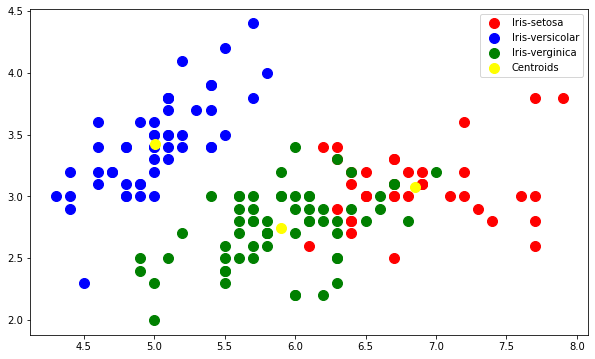

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(x[_kmeans == 0,0], x[_kmeans == 0,1], s=100,c='red',label='Iris-setosa')
plt.scatter(x[_kmeans == 1,0], x[_kmeans == 1,1], s=100,c='blue',label='Iris-versicolar')
plt.scatter(x[_kmeans == 2,0], x[_kmeans == 2,1], s=100,c='green',label='Iris-verginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100,c='yellow',label='Centroids')
plt.legend()

in this way we are able to see the three clusters from the given dataset and visualised it.